In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import torch
import numpy as np
import pandas
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
sys.path.append("applications/align/")
sys.path.append("recognition/arcface_torch")

import cv2
from PIL import Image
from IPython.display import display

Loaded checkpoint weights/arcface/ms1mv3_arcface_r100_fp16.pth


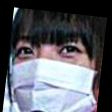

In [62]:
from recognition.arcface_torch.demo import RMFDDataset, MTCNNFaceDetector, FaceAlignTransform, vis_conf_matrix, FaceRecognitionPipeline, ArcFacePredictor, make_low_res_imgs

face_det = MTCNNFaceDetector()
transform = FaceAlignTransform(face_det)
data = RMFDDataset("../data/RMFD", transform=transform)
face_rec_pred = ArcFacePredictor("configs/ms1mv3_r100.py", "weights/arcface/ms1mv3_arcface_r100_fp16.pth")

rec_pipe = FaceRecognitionPipeline(
    face_det=MTCNNFaceDetector(),
    face_rec_pred=face_rec_pred,
    database=None
)

imgs = data.get_images(1, 1, masked=True)

dif_pers = [data.get_images(i, 1, masked=False)[0] for i in range(1, 10+1)]
same_pers = data.get_images(8, 4, masked=False) + data.get_images(8, 4, masked=True)
same_pers_deg_qual = make_low_res_imgs(same_pers[1], (112, 56, 28, 19, 14)) + same_pers[4:]

display(Image.fromarray(same_pers[7]))

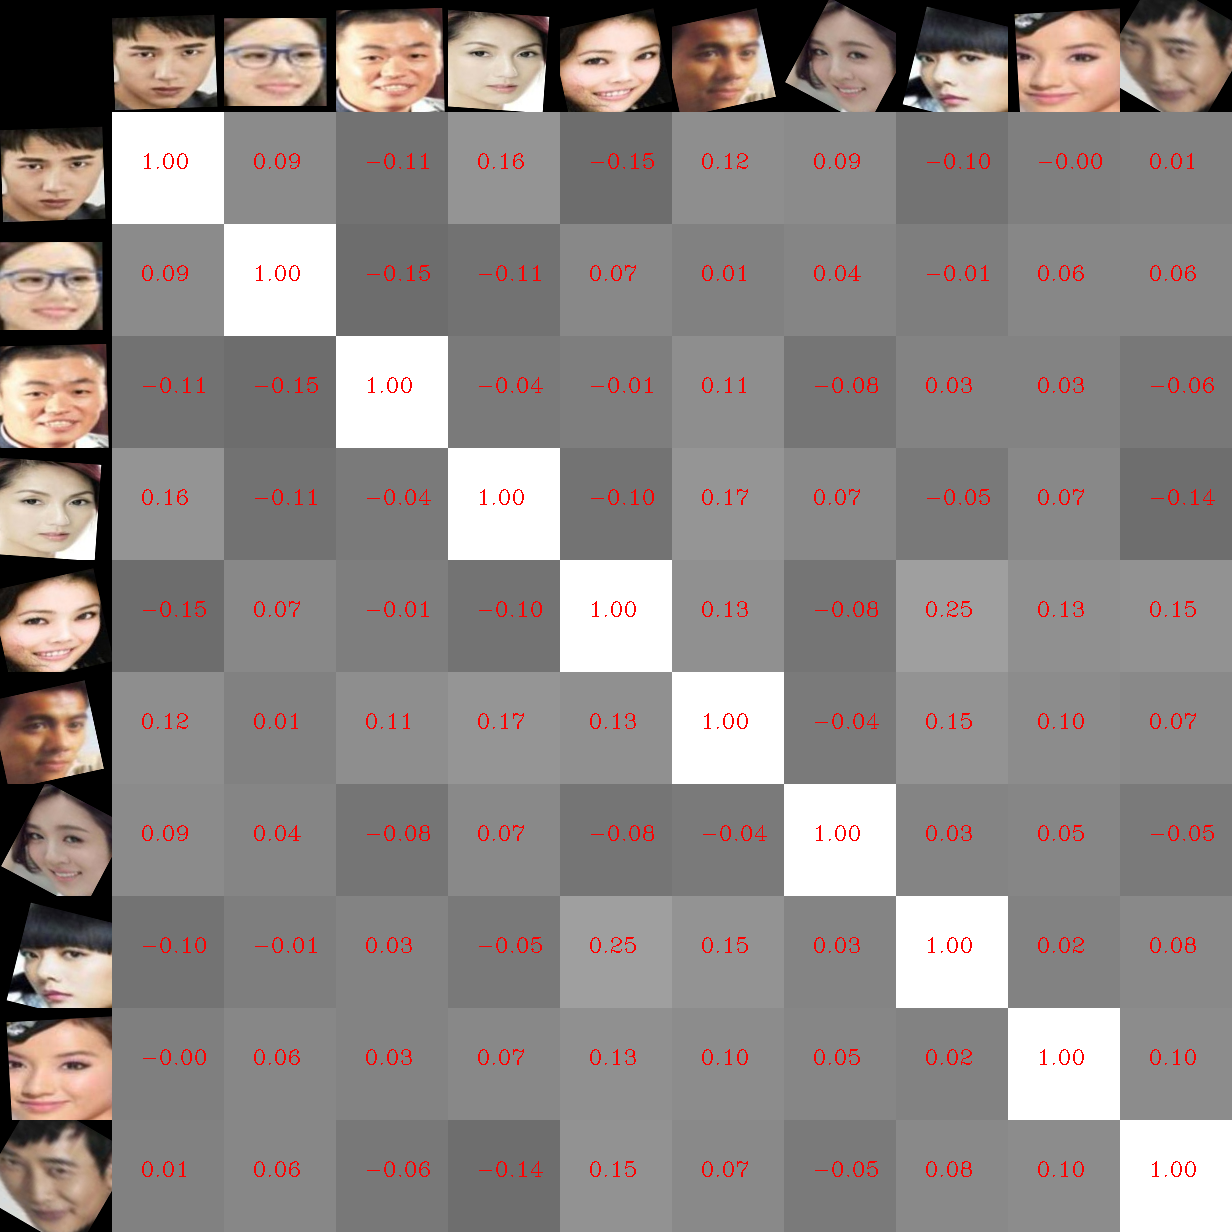

In [55]:
dif_pers_grid = vis_conf_matrix(rec_pipe, dif_pers, dif_pers, False, False)
display(Image.fromarray(dif_pers_grid))

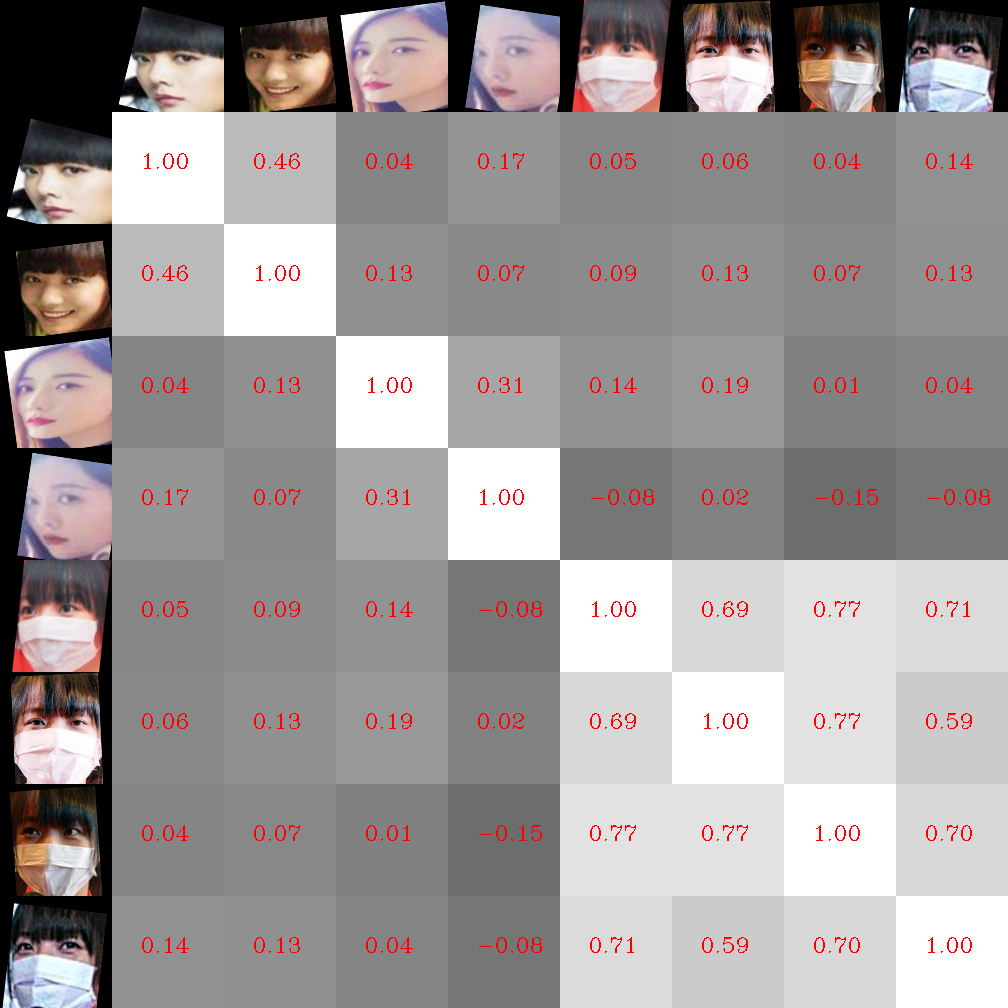

In [56]:
same_pers_grid = vis_conf_matrix(rec_pipe, same_pers, same_pers, False, False)
display(Image.fromarray(same_pers_grid))

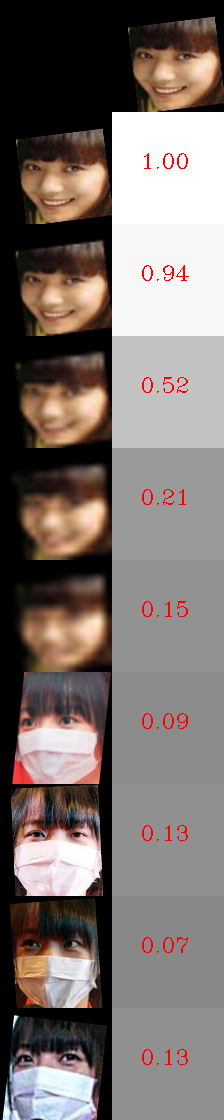

In [63]:
same_pers_deg_qual_grid = vis_conf_matrix(rec_pipe, same_pers_deg_qual, same_pers_deg_qual[:1], False, False)
display(Image.fromarray(same_pers_deg_qual_grid))

In [18]:
sys.path.append("recognition/arcface_torch")
from recognition.arcface_torch.demo import ArcFacePredictor

pred = ArcFacePredictor("configs/ms1mv3_r18.py", "weights/arcface/ms1mv3_arcface_r18_fp16.pth")

feat = pred(warped_face)
feat

Loaded checkpoint weights/arcface/ms1mv3_arcface_r18_fp16.pth


array([[-0.00735685, -0.04464231,  0.01225005, ...,  0.00041474,
        -0.0180374 ,  0.02202151]], dtype=float32)

In [16]:
# compute feature
from recognition.arcface_torch.onnx_helper import ArcFaceORT

model = ArcFaceORT(model_path="onnx/arcface/ms1mv3_arcface_r18_fp16")
print(model.check(test_img=img))

features = extract_feat_onnx(model, warped_face)
features = features / np.linalg.norm(features)
features

use onnx-model: onnx/arcface/ms1mv3_arcface_r18_fp16/model.onnx
input-shape: ['None', 3, 112, 112]
0 Conv_0
1 PRelu_1
2 BatchNormalization_2
3 Conv_3
4 PRelu_4
5 Conv_5
6 Conv_6
7 Add_7
max time cost exceed, given 50.8640


2022-07-06 23:17:24.595568505 [W:onnxruntime:, execution_frame.cc:770 VerifyOutputSizes] Expected shape from model of {1,512} does not match actual shape of {32,512} for output 267
2022-07-06 23:17:24.694786545 [W:onnxruntime:, execution_frame.cc:770 VerifyOutputSizes] Expected shape from model of {1,512} does not match actual shape of {2,512} for output 267


array([[-0.00736595, -0.04469127,  0.01219282, ...,  0.00036485,
        -0.01811458,  0.0220085 ]], dtype=float32)